# SVM (Support Vector Machine)

**하이퍼 파라미터**

<table>
  <thead>
    <tr>
      <th>파라미터 명</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>C</code></td>
      <td>
        학습 데이터의 오류 허용도를 결정<br>
        C 값이 크면 오류를 최소화하고, 결정 경계가 데이터에 더 민감해짐 (마진을 최대화하는 대신 오류를 허용하지 않으므로 과대적합 가능성)<br>
        C 값이 작으면 오류를 허용하면서 일반화에 더 집중 (마진을 최대화하려고 노력하면서 오류를 어느 정도 허용하나 과소적합 가능성)
      </td>
    </tr>
    <tr>
      <td><code>kernel</code></td>
      <td>
        비선형 데이터의 변환을 위한 커널 함수 설정
        <ul>
          <li><code>linear</code>: 선형 커널 (데이터가 선형적으로 분리 가능한 경우)</li>
          <li><code>poly</code>: 다항식 커널 (비선형 관계, 차수 degree로 지정)</li>
          <li><code>rbf</code>: RBF(Radial Basis Function)커널, 가우시안 커널로 비선형 데이터 처리 → gamma 작다 : 일반화 / 크다 : 경계선 강화</li>
          <li><code>sigmoid</code>: 시그모이드 커널</li>
        </ul>
      </td>
    </tr>
  </tbody>
</table>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)


In [4]:
# 모델 학습 및 평가
from sklearn.svm import SVC

model = SVC(kernel='linear') # 선형적 데이터 분류
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [5]:
# 모델 학습 및 평가
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.kernel

'rbf'

In [6]:
# 모델 학습 및 평가
from sklearn.svm import SVC

model = SVC()       # 기본값은 rbf
model.fit(X_train, y_train)
model.score(X_test, y_test)
model.kernel

'rbf'

In [7]:
# 모델 학습 및 평가
from sklearn.svm import SVC

model = SVC(kernel='linear') # 선형적 데이터 분류
model.fit(X_train, y_train)
model.score(X_test, y_test)

# 우리의 목표는 '초평면'을 찾는 것이다..

iris_data.feature_names # 특성 4개 중에서 2개만 사용해서 분류 모델 만들기

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
# 시각화를 위한 데이터 준비 (데이터 프레임 생성 -> 특성 두 개만 이용)
# 데이터 프레임은 데이터를 시각화해서 보기 위해서 만들었다.

                                            # 슬라이싱을 통해서 차원 유지
df = pd.DataFrame(iris_data.data[:, :2],    # iris_data.data 중에서 2개 특성만 사용, 2차원 배열이기 때문에 슬라이싱 사용 [:, :2] 전체행, 2개 열
columns=iris_data.feature_names[:2])
df['target'] = iris_data.target
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [10]:
# 훈련/테스트 데이터 분리
# 시각화를 위해 특성 2개만 남김 → 초평면을 확인하기 위해서 필요한 과정
# 모델 → 학습 → 평가 → 시각화 = 결과로 초평면을 확인할 수 있다.

X = iris_data.data[:, :2]
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 모델 학습 및 평가
svm_clf = SVC(kernel='linear', C=1.0)      # rbf 커널 사용, C는 규제 파라미터 : (0.7833333333333333, 0.9)
                                              # C (기본값 1.0) : (0.8, 0.9)
                                              # C 1000.0 : (0.7833333333333333, 0.9) 
                                              # C 0.001 : (0.3416666666666667, 0.3) → 과소 적합

svm_clf.fit(X_train, y_train)
svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

(0.8, 0.9)

In [12]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

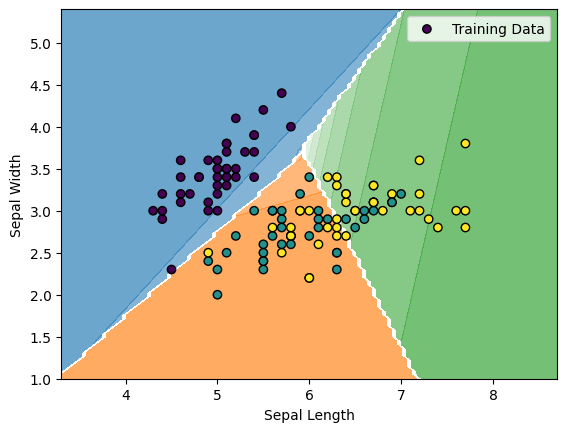

In [13]:
from sklearn.inspection import DecisionBoundaryDisplay

# DecisionBoundaryDisplay 클래스는 결정 경계를 시각화하는 데 사용되는 클래스
# from_estimator 

# 결정 경계계
dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7) # 첫번째 인자 : 모델, 두번째 데이터 : 훈련, alpha : 결정경계의 투명도
# 결정 경계와 훈련 데이터를 그려준다.

# 훈련도를 산점도로 그려보기
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", label="Training Data")

 # .scatter(x, y, c=y_train, edgecolor="k", label="Training Data") : y_train class에 따른 색깔로 표시
 # iris_data.target_names : array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
 # y_train → 0, 1, 2 → 0: setosa, 1: versicolor, 2: virginica
 # 0: 초록색, 1: 빨간색, 2: 파란색

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
# # 결정 경계 시각화
# dbd.plot()
plt.show()



In [14]:
# 모델 학습 및 평가 → rbf

# RBF 커널 사용 시각화
svm_clf = SVC(kernel='rbf', C=1.0, gamma=100.5)    # gamma 값이 크면 결정 경계가 복잡해진다. = 복잡
# svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.5)      # gamma 값이 작으면 결정 경계가 부드러워진다. = 단순

# rbf 커널 사용, C는 규제 파라미터
# C=1.0, gamma=0.5 :(0.7916666666666666, 0.9)
# C=1.0, gamma=1 : (0.8, 0.9) 
# C=1.0, gamma=0.001 : (0.3416666666666667, 0.3) → 과소 적합

svm_clf.fit(X_train, y_train)
svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

(0.9416666666666667, 0.6666666666666666)

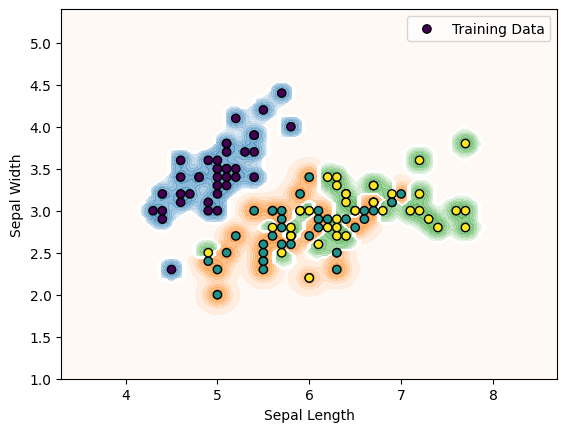

In [15]:
# 결정 경계

dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7) # 첫번째 인자 : 모델, 두번째 데이터 : 훈련, alpha : 결정경계의 투명도
# 결정 경계와 훈련 데이터를 그려준다.
# gamma 가 작을 수록 결정 경계가 부드러워진다. = 단순
# gamma 가 클 수록 결정 경계가 복잡해진다. = 복잡

# ? 왜 dbd 

# 훈련도를 산점도로 그려보기
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", label="Training Data")

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
# # 결정 경계 시각화
# dbd.plot()
plt.show()

In [16]:
# 모델 학습 및 평가 → rbf

# RBF 커널 사용 시각화
# svm_clf = SVC(kernel='rbf', C=1.0, gamma=100.5)    # gamma 값이 크면 결정 경계가 복잡해진다. = 복잡
svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.5)      # gamma 값이 작으면 결정 경계가 부드러워진다. = 단순

# rbf 커널 사용, C는 규제 파라미터
# C=1.0, gamma=0.5 :(0.7916666666666666, 0.9)
# C=1.0, gamma=1 : (0.8, 0.9) 
# C=1.0, gamma=0.001 : (0.3416666666666667, 0.3) → 과소 적합

svm_clf.fit(X_train, y_train)
svm_clf.score(X_train, y_train), svm_clf.score(X_test, y_test)

(0.7916666666666666, 0.9)

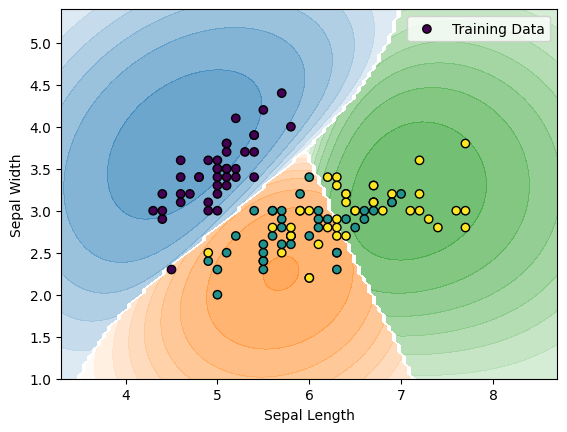

In [17]:
# 결정 경계

dbd = DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7) # 첫번째 인자 : 모델, 두번째 데이터 : 훈련, alpha : 결정경계의 투명도
# 결정 경계와 훈련 데이터를 그려준다.
# gamma 가 작을 수록 결정 경계가 부드러워진다. = 단순
# gamma 가 클 수록 결정 경계가 복잡해진다. = 복잡

# ? 왜 dbd 

# 훈련도를 산점도로 그려보기
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", label="Training Data")

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
# # 결정 경계 시각화
# dbd.plot()
plt.show()

# SVR (Support Vector Regressor)

| 특징                   | SVC                                    | SVR                                    |
|----------------------|---------------------------------------|---------------------------------------|
| **목적**              | 이진 분류 문제 해결                   | 연속적인 값 예측                      |
| **결정 경계**         | 서포트 벡터와의 거리를 최대화하여 생성 | 데이터 포인트와의 오차를 최소화하여 생성 |
| **마진/허용 오차**    | 마진을 최대화하여 일반화 성능 향상    | ε 매개변수로 허용 오차 범위 설정       |
| **결과**              | 클래스 예측 (이진 분류)               | 연속적인 값 예측                      |


**작동 원리**

1. **𝜖-튜브(엡실론 튜브)**
   - 데이터 포인트와 예측 값 사이의 허용 오차 범위를 정의
   - 𝜖(엡실론 튜브) : 값을 기준으로 오차가 범위 내에 있으면 무시, 범위를 벗어나면 벌칙(Penalty)을 부여

2. **최적화 목표**
   - 𝜖-튜브 내부에 데이터를 포함하면서, 오차를 최소화하고 마진(Margin)을 최대화

3. **커널 트릭**
   - 비선형 데이터를 고차원 공간으로 매핑하여 선형적으로 해결 가능

In [18]:
X_sample =np.sort(np.random.rand(40, 1)* 5, axis=0)
X_sample

array([[0.11781724],
       [0.15789451],
       [0.18563425],
       [0.32285248],
       [0.61019598],
       [0.98591963],
       [1.17626261],
       [1.2364368 ],
       [1.56430898],
       [1.5873849 ],
       [1.70887435],
       [2.0219059 ],
       [2.16092967],
       [2.18765501],
       [2.31198407],
       [2.52863183],
       [2.59419053],
       [2.80929069],
       [2.8445459 ],
       [3.33967441],
       [3.38306243],
       [3.53171307],
       [3.53510876],
       [3.78742663],
       [3.86041252],
       [3.91370474],
       [3.96132519],
       [4.10056268],
       [4.11416778],
       [4.25750715],
       [4.28198841],
       [4.31473448],
       [4.6624474 ],
       [4.70648471],
       [4.71195812],
       [4.85133625],
       [4.88021849],
       [4.89063622],
       [4.91128153],
       [4.97461672]])

In [19]:
y_sample = np.sin(X_sample).ravel()
y_sample

array([ 0.11754486,  0.15723926,  0.18456992,  0.31727295,  0.57302808,
        0.83378016,  0.92317589,  0.94462069,  0.99997896,  0.99986241,
        0.99048237,  0.89996392,  0.83086649,  0.81569965,  0.73766716,
        0.57529178,  0.52047072,  0.32621992,  0.29269758, -0.19678896,
       -0.23913002, -0.38029979, -0.38343813, -0.60186466, -0.65849698,
       -0.69764998, -0.73096334, -0.81860042, -0.82633869, -0.89831295,
       -0.90879869, -0.92197184, -0.99875318, -0.99998257, -0.99999991,
       -0.99036235, -0.98594965, -0.98415598, -0.98028599, -0.96581487])

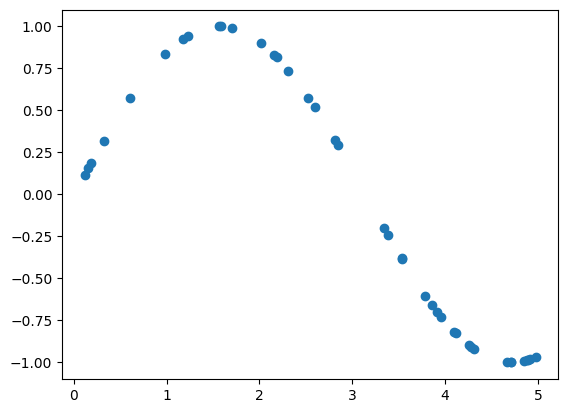

In [20]:
plt.scatter(X_sample, y_sample)
plt.show()

In [21]:
# 데이터 준비
np.random.seed(0)
X = np.sort(np.random.rand(40, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.randn(40) * 0.1

#.ravel() : 1차원 배열로 변환

# 테스트 데이터 준비
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
# y_test = np.sin(X_test).ravel()

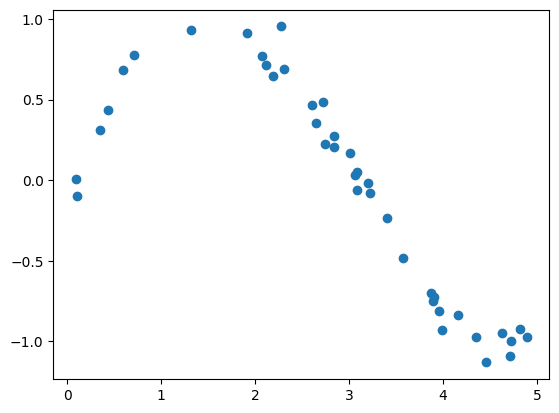

In [22]:
plt.scatter(X, y)
plt.show()

In [23]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3, gamma=0.1)
svr_poly = SVR(kernel='poly', C=1e3, gamma=0.1)

# SVR().kernel # 기본값은 'rbf'

# 모델 학습
svr_rbf.fit(X, y)
svr_lin.fit(X, y)
svr_poly.fit(X, y)

# 예측
pred_rbf = svr_rbf.predict(X_test)
pred_lin = svr_lin.predict(X_test)
pred_poly = svr_poly.predict(X_test)

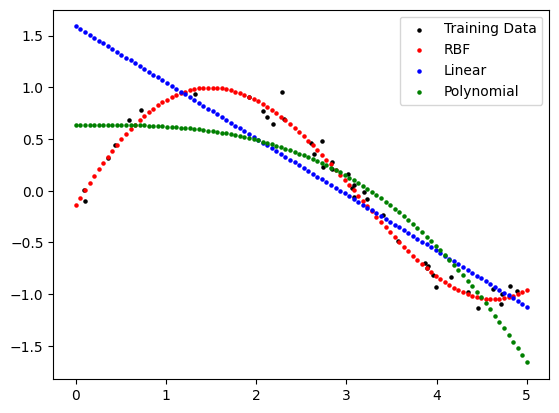

In [24]:
# 시각화
plt.scatter(X, y, color='black', s=5, label='Training Data')
plt.scatter(X_test, pred_rbf, color='red', s=5, label='RBF')
plt.scatter(X_test, pred_lin, color='blue', s=5, label='Linear')
plt.scatter(X_test, pred_poly, color='green', s=5, label='Polynomial')
plt.legend()
plt.show()

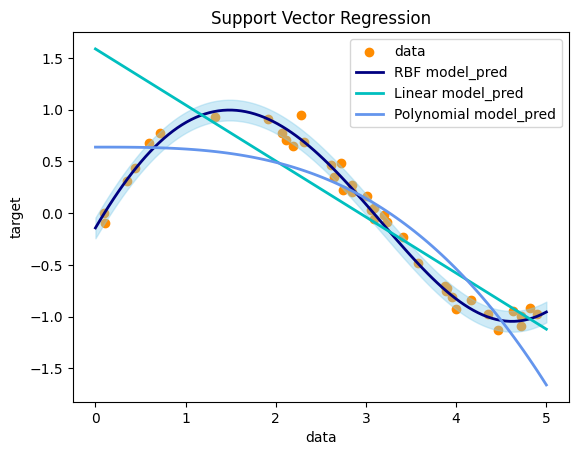

In [25]:
# 결과 시각화
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, pred_rbf, color='navy', lw=2, label='RBF model_pred')
plt.plot(X_test, pred_lin, color='c', lw=2, label='Linear model_pred')
plt.plot(X_test, pred_poly, color='cornflowerblue', lw=2, label='Polynomial model_pred')

# epsilon 오차 범위 시각화
svr_rbf_epsilon = svr_rbf.epsilon
# svr_rbf_epsilon # 0.1 -> 기본값

epsilon_upper = pred_rbf + svr_rbf_epsilon
epsilon_lower = pred_rbf - svr_rbf_epsilon

plt.fill_between(X_test.ravel(), epsilon_lower, epsilon_upper, color='skyblue', alpha=0.4)
# .fill_between 은 두 개의 배열을 받아서 그 사이의 영역을 채워준다.
# .fill_between은 1차원 배열만 받는다.
# X_test.ravel() : 1차원 배열로 변환 → 벡터화 연산 가능
# epsilon_lower : 하한
# epsilon_upper : 상한
# color : 색깔
# alpha : 투명도

plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [26]:
##### 캘리포니아 주택 가격 예측

In [27]:
# 데이터 준비
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

In [28]:
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [29]:
# 데이터 분리 및 스케일링
X = housing_data.data
y = housing_data.target

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# SVR 모델 훈련 및 평가

from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_rbf.fit(X_train_scaled, y_train)
svr_rbf.score(X_train_scaled, y_train), svr_rbf.score(X_test_scaled, y_test)

# MSE, R2, MAE, RMSE 평가


(0.7406150539849892, 0.7208585607140761)

In [31]:
# 예측 결과 시각화